# Working with web maps and web scenes

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Working-with-web-maps-and-web-scenes" data-toc-modified-id="Working-with-web-maps-and-web-scenes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Working with web maps and web scenes</a></span><ul class="toc-item"><li><span><a href="#Working-with-web-maps" data-toc-modified-id="Working-with-web-maps-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Working with web maps</a></span><ul class="toc-item"><li><span><a href="#Searching-for-web-maps" data-toc-modified-id="Searching-for-web-maps-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Searching for web maps</a></span></li><li><span><a href="#Creating-a-WebMap-object" data-toc-modified-id="Creating-a-WebMap-object-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Creating a <code>WebMap</code> object</a></span></li><li><span><a href="#Displaying-the-web-map" data-toc-modified-id="Displaying-the-web-map-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Displaying the web map</a></span></li><li><span><a href="#Removing-layers-from-a-web-map" data-toc-modified-id="Removing-layers-from-a-web-map-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Removing layers from a web map</a></span></li><li><span><a href="#Adding-layers-to-a-web-map" data-toc-modified-id="Adding-layers-to-a-web-map-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Adding layers to a web map</a></span></li><li><span><a href="#Saving-or-Updating-a-web-map" data-toc-modified-id="Saving-or-Updating-a-web-map-1.1.6"><span class="toc-item-num">1.1.6&nbsp;&nbsp;</span>Saving or Updating a web map</a></span></li></ul></li><li><span><a href="#Working-with-web-scenes" data-toc-modified-id="Working-with-web-scenes-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Working with web scenes</a></span></li><ul class="toc-item"><li><span><a href="#Searching-for-web-scene-items" data-toc-modified-id="Searching-for-web-scene-items-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Searching for web scene items</a></span><li><span><a href="#Creating-a-WebScene-object" data-toc-modified-id="Creating-a-WebScene-object-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Creating a <code>WebScene</code> object</a></span></li><li><span><a href="#Displaying-the-web-scene" data-toc-modified-id="Displaying-the-web-scene-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Displaying the web scene</a></span></li><li><span><a href="#Updating-a-web-scene" data-toc-modified-id="Updating-a-web-scene-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Updating a web scene</a></span></li></ul></li></ul></li></ul></div>

An ArcGIS web map is an interactive display of geographic information through a composition of web layers, basemap and much more. A web scene is analogous to a web map but in the 3D space. To get and overview, visit the product documentation for [web maps](http://doc.arcgis.com/en/arcgis-online/reference/what-is-web-map.htm) and [web scenes](http://doc.arcgis.com/en/arcgis-online/reference/what-is-web-scene.htm).

Web maps and scenes are stored as items on your portal and their content is in JavaScript Object Notation (JSON), a text format that can easily be transferred, stored, and edited. In this guide we will observe how to work maps and scenes using the `arcgis.layers` module.

## Working with web maps
2D maps in your GIS are stored as web map items. A web map contains a JSON defining the bookmarks, layers, their symbology, order and other cartographic information. If you are interested in learning more about this specification, refer to this [documentation](/web-map-specification/). In the `mapping` module, web maps are represented using a `WebMap` class. At version 1.3 of the Python API, the `WebMap` class has been enhanced with the ability to easily add, remove layers and a few other basic operations.

In [1]:
from IPython.display import display
import arcgis
from arcgis.gis import GIS

# connect to your GIS
gis = GIS('home')

### Searching for web maps
We can search for web maps just like any other item:

In [44]:
webmap_search = gis.content.search("Drilling *", item_type="Web Map")
webmap_search

[<Item title:"USA WebMap with Drilling Platforms" type:Web Map owner:arcgis_python>]

Let us take a look at one of the web maps

<Item title:"USA WebMap with Drilling Platforms" type:Web Map owner:arcgis_python>
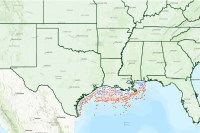

In [45]:
drilling_item = webmap_search[0]
drilling_item

### Creating a `Map` object
You can create an empty web map with a default basemap and no operational by initializing the `Map` class with no arguments:

In [46]:
from arcgis.map import Map
empty_webmap = Map()

In [47]:
type(empty_webmap)

arcgis.map.map_widget.Map

The operational layers information is empty:

In [48]:
empty_webmap.content.layers

[]

The basemap information uses the properties of the organization:

In [50]:
empty_webmap.basemap.basemap

{'baseMapLayers': [{'id': 'VectorTile_7665',
   'itemId': '273bf8d5c8ac400183fc24e109d20bcf',
   'layerType': 'VectorTileLayer',
   'opacity': 1.0,
   'styleUrl': 'https://www.arcgis.com/sharing/rest/content/items/273bf8d5c8ac400183fc24e109d20bcf/resources/styles/root.json',
   'title': 'Community',
   'type': 'VectorTileLayer',
   'visibility': True}],
 'title': 'Community Map'}

You can also create a `WebMap` object from an existing web map item by passing the web map item as the parameter to the constructor:

In [51]:
drilling_map = Map(
    item=drilling_item
)

A typical web map consists of a few operational layers and one or more basemap layers. To view the operational layers, call the `content` property to initialize a _Map Content_ object, and then use the content's `layers` property:

In [53]:
drilling_map.content.layers

[<FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_Drilling_Platforms_(HFS)/FeatureServer/0">,
 <FeatureLayer url:"https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/USA_States_Generalized/FeatureServer/0">]

Similarly, you can find what basemap is used in this web map by querying the _Map_ `basemap` property to initialize the `BasemapManager`, and then using the manager's `basemap` property:

In [58]:
drilling_map.basemap

Basemap Manager

In [55]:
drilling_map.basemap.basemap

{'baseMapLayers': [{'id': 'World_Hillshade_3689',
   'layerType': 'ArcGISTiledMapServiceLayer',
   'opacity': 1.0,
   'refreshInterval': 0,
   'title': 'World Hillshade',
   'url': 'https://services.arcgisonline.com/arcgis/rest/services/Elevation/World_Hillshade/MapServer',
   'visibility': True},
  {'id': 'VectorTile_6451',
   'layerType': 'VectorTileLayer',
   'opacity': 1.0,
   'styleUrl': 'https://cdn.arcgis.com/sharing/rest/content/items/7dc6cea0b1764a1f9af2e679f642f0f5/resources/styles/root.json',
   'title': 'World Topographic Map',
   'visibility': True}],
 'title': 'Topographic'}

### Displaying the web map
When using the Jupyter Lab notebook environment, a `Map` object can be easily visualized by simply querying it. A map widget loads up and the map is rendered:


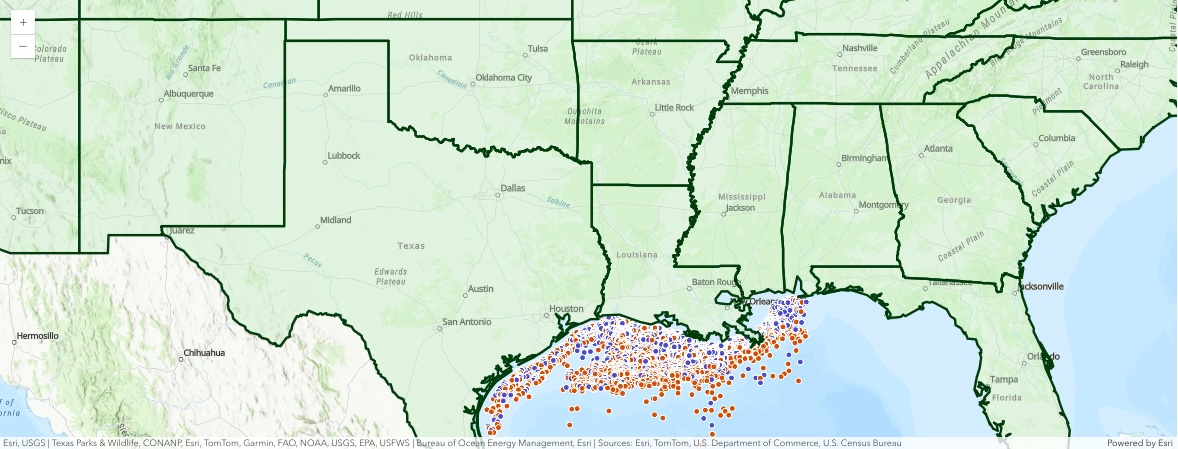

In [60]:
drilling_map

### Removing layers from a web map
You can update a web map by adding or removing layers. For instance, the cell below removes one of the layers from the web map.

In [63]:
for idx, lyr in enumerate(drilling_map.content.layers):
    print(f"{idx:<6}{lyr}")

0     <FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_Drilling_Platforms_(HFS)/FeatureServer/0">
1     <FeatureLayer url:"https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/USA_States_Generalized/FeatureServer/0">


In [65]:
drilling_map.content.remove(1)

True

In [66]:
for idx, lyr in enumerate(drilling_map.content.layers):
    print(f"{idx:<6}{lyr}")

0     <FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_Drilling_Platforms_(HFS)/FeatureServer/0">


### Adding layers to a web map
To add new layers, call the `Map.content.add()` method. You can add many different types of layers with this method, such as `FeatureLayer`, `ImageryLayer`, or `FeatureCollection` objects, as well as using `Items` as input. The code below adds a feature layer collection item to the web map and updates the layer's title property at the same time.

In [67]:
trunks_item = gis.content.get('bb2aee97117d403ea63bcfe6be4a12c8')

drilling_map.content.add(
    trunks_item, options={'title':'Crude Oil Trunk Pipelines'})

### Saving or Updating a web map
To save a web map from a brand new widget, simply call the `save()` method on the _Map_ object. If you created the `Map` object from an existing web map item, then you can call the `update()` method to update its properties. 

> **Note:** -  `save()` always creates a new item with updated web map definition, so if you want to create a copy of an existing web map, this is a great way. For instance, the cell below calls the `save()` method and creates a new web map item with the new set of layers without disturbing the original web map item.

<Item title:"USA Drilling Platforms and Crude Trunks" type:Web Map owner:arcgis_python>
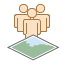

In [68]:
webmap_item_properties = {'title':'USA Drilling Platforms and Crude Trunks',
                         'snippet':'Map created using Python API showing locations of US oil platforms and crude trunks.',
                         'tags':['oil', 'raw materies', 'utilities', 'python']}

drilling_map.save(webmap_item_properties, thumbnail='./webmap_thumbnail.png')

## Working with web scenes
In your GIS, 3D maps are stored as Web Scene items. Similar to web maps, web scenes contain the definition of the layers and their cartography in JSON format. In the `map` module, a web scene is represented using the `Scene` class.

You can search for a web scene similar to any other item:

### Searching for web scene items

In [6]:
webscene_search = gis.content.search("Typhoons", item_type="Web Scene")
webscene_search

[<Item title:"Toprical Cyclones - Summer" type:Web Scene owner:arcgis_python>,
 <Item title:"Toprical Cyclones - Summer" type:Web Scene owner:arcgis_python>,
 <Item title:"Toprical Cyclones - Summer" type:Web Scene owner:arcgis_python>,
 <Item title:"Toprical Cyclones - Basemap updated 3" type:Web Scene owner:arcgis_python>,
 <Item title:"Toprical Cyclones - Basemap updated" type:Web Scene owner:arcgis_python>,
 <Item title:"Toprical Cyclones - Summer" type:Web Scene owner:arcgis_python>,
 <Item title:"Toprical Cyclones - Summer" type:Web Scene owner:arcgis_python>,
 <Item title:"Recent Storm Scene" type:Web Scene owner:arcgis_python>,
 <Item title:"Toprical Cyclones - Summer" type:Web Scene owner:arcgis_python>,
 <Item title:"Toprical Cyclones - Basemap updated 2" type:Web Scene owner:arcgis_python>]

Let us access the first web scene from this list.

<Item title:"Recent Storm Scene" type:Web Scene owner:arcgis_python>
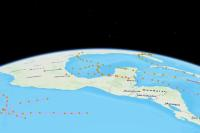

In [7]:
webscene_item = webscene_search[7]
webscene_item

### Creating a `Scene` object

You can create an emtpy Scene the same way you create an empty map:

In [8]:
from arcgis.map import Scene

empty_scene = Scene()

In [2]:
empty_scene.content.layers

[]

You can create a `Scene` object by passing an existing web scene item as the `Scene` class's _item_ argument:

In [9]:
scene_obj = Scene(
    item=webscene_item
)

You can view the list of layers in this web scene by querying the `content` property to return a `SceneContent` object, then using its `layers` property to list the operational layers:

In [189]:
scene_content = scene_obj.content

In [190]:
scene_content.layers

[Group Layer: Recent Hurricanes, Cyclones and Typhoons]

### Displaying the web scene
When using the Jupyter Lab notebook environment, a `Scene` object can be easily visualized by simply querying it. A map widget loads up and the scene is rendered:


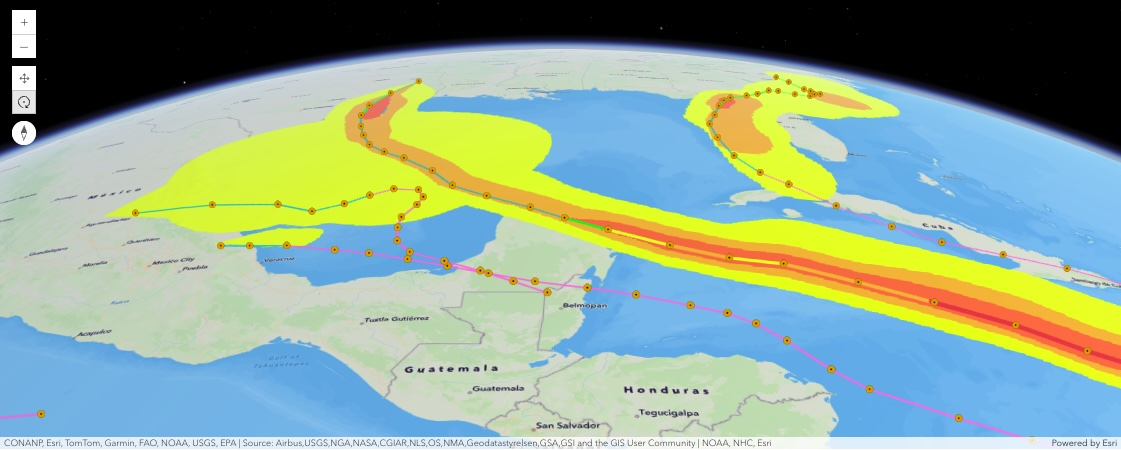

In [195]:
scene_obj

In [192]:
scene_obj.center = [20.138470, -88.870125]

> **note:** Use the rotate button to change the tilt and elevation position values to observe 3D properties and create a view like that above. You can print out the _camera_ properties after using the interactive buttons to see how the camera operates:

In [194]:
scene_obj.camera

{'position': {'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
  'x': -9835222.48051016,
  'y': 252804.4801989533,
  'z': 1955763.3549772874},
 'heading': 358.4031426650046,
 'tilt': 41.37345157801427}

### Updating a web scene
The `Scene` object provides an `update()` method that allows you to modify the Web Scene item used to initialize the _Scene_ object. To update a web scene, you can add or remove content, as well as change any item properties by submitting a dictionary argument to the _item_properties_ argument, or provide a thumbnail and new metadata. We'll update the tags and title of the current scene:

> **note:** The _title_, _tags_ and _snippet_ keys are required when updating.

In [202]:
updated_scene = scene_obj.save(
    item_properties={
        "title":"Storm Scene Updates",
        "snippet":"Web Scene updated through the API.",
        "tags": scene_obj.item.tags + ["api_updates"]
    }
)

In [203]:
updated_scene

<Item title:"Storm Scene Updates" type:Web Scene owner:arcgis_python>